# Simple Linear Regression with OLS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Generate Simulated data

In [2]:
x, y, coef = make_regression(n_samples = 200, n_features = 1, n_targets = 1, bias = 10, noise = 20, random_state = 20, coef = True)

## Visualising

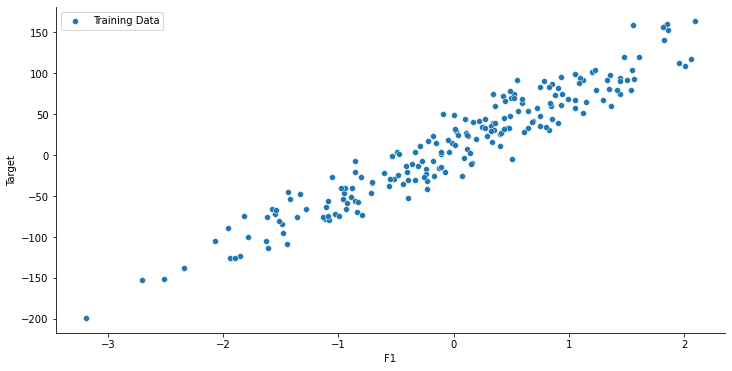

In [3]:
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x = x.reshape(len(x, )), y = y)
ax.set_xlabel('F1')
ax.set_ylabel('Target')
sns.despine()
ax.legend(['Training Data'])

## Fit Model

In [4]:
reg = LinearRegression()
reg.fit(x, y)

LinearRegression()

In [5]:
preds = reg.predict(x)

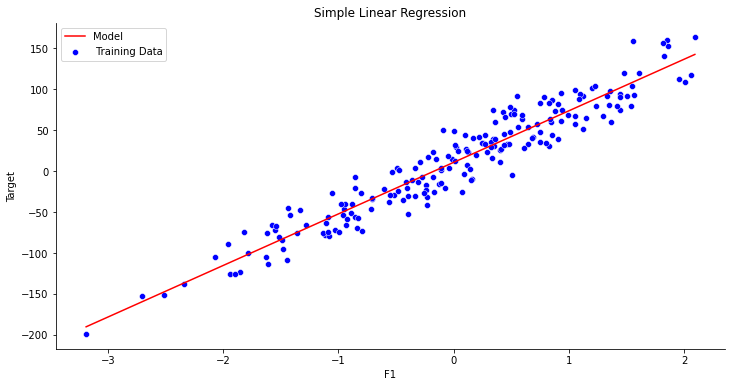

In [6]:
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x = x.reshape(len(x, )), y = y, color = 'b')
sns.lineplot(x = x.reshape(len(x, )), y = preds, color = 'r')
ax.set_xlabel('F1')
ax.set_ylabel('Target')
sns.despine()
ax.set_title('Simple Linear Regression')
ax.legend(['Model', ' Training Data'])

In [7]:
mse = mean_squared_error(preds, y)
rmse = np.sqrt(mse)

print('RMSE: ', rmse)

RMSE:  19.61956035849356


## Prove Least Squares 

#### Extract model coefficients

In [8]:
print('B1 Coefficient: ', reg.coef_)
print('B0 Bias: ', reg.intercept_)

B1 Coefficient:  [62.89160477]
B0 Bias:  10.508303059348316


In [9]:
x = x.reshape(len(x, ))

In [10]:
MR_f = x - np.mean(x)

In [11]:
MR_t = y - np.mean(y)

In [12]:
b1_coef = np.sum((MR_f * MR_t)) / np.sum(MR_f * MR_f)
b0_bias = np.mean(y) - (b1_coef*np.mean(x))

In [13]:
print('B1 Coefficient (calculation):',  b1_coef)
print('B0 Bias (calculation): ',  b0_bias)

B1 Coefficient (calculation): 62.891604766117204
B0 Bias (calculation):  10.508303059348316


## Make Predictions

In [15]:
new_input = np.array([0.5, 1.8, -2.6])
new_preds = reg.predict(new_input.reshape(-1, 1))
print('New predictions: ', new_preds)

New predictions:  [  41.95410544  123.71319164 -153.00986933]


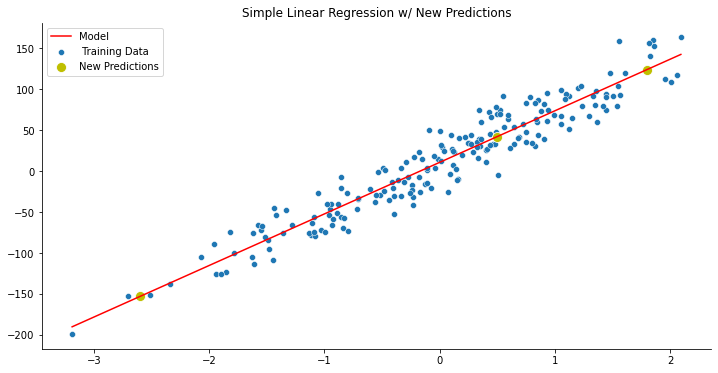

In [16]:
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x = x, y = y)
sns.lineplot(x = x, y = preds, color = 'r')
sns.scatterplot(x = new_input, y = new_preds, color = 'y', s = 100)

sns.despine()
ax.set_title('Simple Linear Regression w/ New Predictions')
ax.legend(['Model', ' Training Data',  'New Predictions'])